# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.68dev'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
# This loads in the spectra you saved as weak, medium and strong etc
import os
df2=pf.merge_fit_files(path=os.getcwd())

## First, get the metadata for this day

In [5]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=file_ext, exclude_str=['Ne', 'FG', 'Cap','window'],
 sort=True)
diad_meta[0]

'K21-59-FI#1-IMG (1).txt'

## Now get all the important information out of the metadata files

In [6]:
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=prefix_str,
trupower=TruPower)
meta.head()

100%|██████████| 42/42 [00:01<00:00, 33.56it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,K21-59-FI#1.txt,"October 28, 2022\n",October,28.0,12.078,45.0,5.0,50.0,"['0h', '3m', '47s']",12:09:55 PM\n,43795.0,1325.004
1,K21-59-FI#2.txt,"October 28, 2022\n",October,28.0,12.068,45.0,5.0,50.0,"['0h', '3m', '47s']",12:19:53 PM\n,44393.0,1325.004
2,K21-59-FI#3.txt,"October 28, 2022\n",October,28.0,12.064,45.0,5.0,50.0,"['0h', '3m', '47s']",12:32:26 PM\n,45146.0,1325.004
3,K21-61-FI#1-rep1.txt,"October 28, 2022\n",October,28.0,12.046,45.0,5.0,50.0,"['0h', '3m', '47s']",12:45:44 PM\n,45944.0,1325.004
4,K21-61-FI#1-rep2.txt,"October 28, 2022\n",October,28.0,12.030,45.0,5.0,50.0,"['0h', '3m', '46s']",12:50:47 PM\n,46247.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [7]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'K21-59-FI#1'

## Now get filename from spectra into same form as metadata

In [9]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
K21-59-FI#1


In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,K21-59-FI#1,103.057930,0.004029,1286.035372,0.003584,591.792416,1286.035422,605.447355,0.434264,2.947177,...,October,28.0,12.078,45.0,5.0,50.0,"['0h', '3m', '47s']",12:09:55 PM\n,43795.0,1325.004
1,K21-59-FI#2,103.011312,0.011666,1286.157504,0.009924,227.655287,1286.157504,198.586229,0.409722,3.210508,...,October,28.0,12.068,45.0,5.0,50.0,"['0h', '3m', '47s']",12:19:53 PM\n,44393.0,1325.004
2,K21-59-FI#3,103.046227,0.003908,1286.074215,0.003398,570.233150,1286.074265,580.899299,0.422487,2.881305,...,October,28.0,12.064,45.0,5.0,50.0,"['0h', '3m', '47s']",12:32:26 PM\n,45146.0,1325.004
3,K21-61-FI#1-rep1,103.312259,0.032060,1285.431180,0.029402,66.226628,1285.431180,80.426951,0.570436,3.334594,...,October,28.0,12.046,45.0,5.0,50.0,"['0h', '3m', '47s']",12:45:44 PM\n,45944.0,1325.004
4,K21-63-FI#1,103.341199,0.010487,1285.310966,0.009343,125.760313,1285.311016,212.868302,0.630393,1.596078,...,October,28.0,12.043,45.0,5.0,50.0,"['0h', '3m', '46s']",2:18:52 PM\n,51532.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=prefix_str, file_ext=file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [15]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,K21-59-FI#1,0.033938,0.004197,0.001613,0.003875,102.835906,0.004070,0.000634,0.004029,12.078,...,NaN,NaN,NaN,NaN,NaN,0.032879,43795.0,0.997846,0.997839,0.997852
1,K21-59-FI#2,0.015192,0.006067,0.004619,0.003934,102.788597,0.011658,0.000627,0.011666,12.068,...,NaN,NaN,NaN,NaN,NaN,NaN,44393.0,0.997838,0.997832,0.997844
2,K21-59-FI#3,0.028621,0.004193,0.001565,0.003890,102.822487,0.003949,0.000620,0.003908,12.064,...,NaN,NaN,NaN,NaN,NaN,NaN,45146.0,0.997829,0.997823,0.997835
3,K21-61-FI#1-rep1,0.133429,0.013251,0.012678,0.003855,103.086993,0.031996,0.000614,0.032060,12.046,...,NaN,NaN,NaN,NaN,NaN,NaN,45944.0,0.997820,0.997814,0.997826
4,K21-63-FI#1,0.142909,0.005682,0.004153,0.003879,103.110918,0.010480,0.000592,0.010487,12.043,...,NaN,NaN,NaN,NaN,NaN,0.138489,51532.0,0.997772,0.997766,0.997777


In [16]:
# This cell saves the merged together dataframe with the folder name and the date you fitted it
from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_October 28, 2022_fitted_2023-07-17.xlsx


## This helps visualize the errors on each spectra 

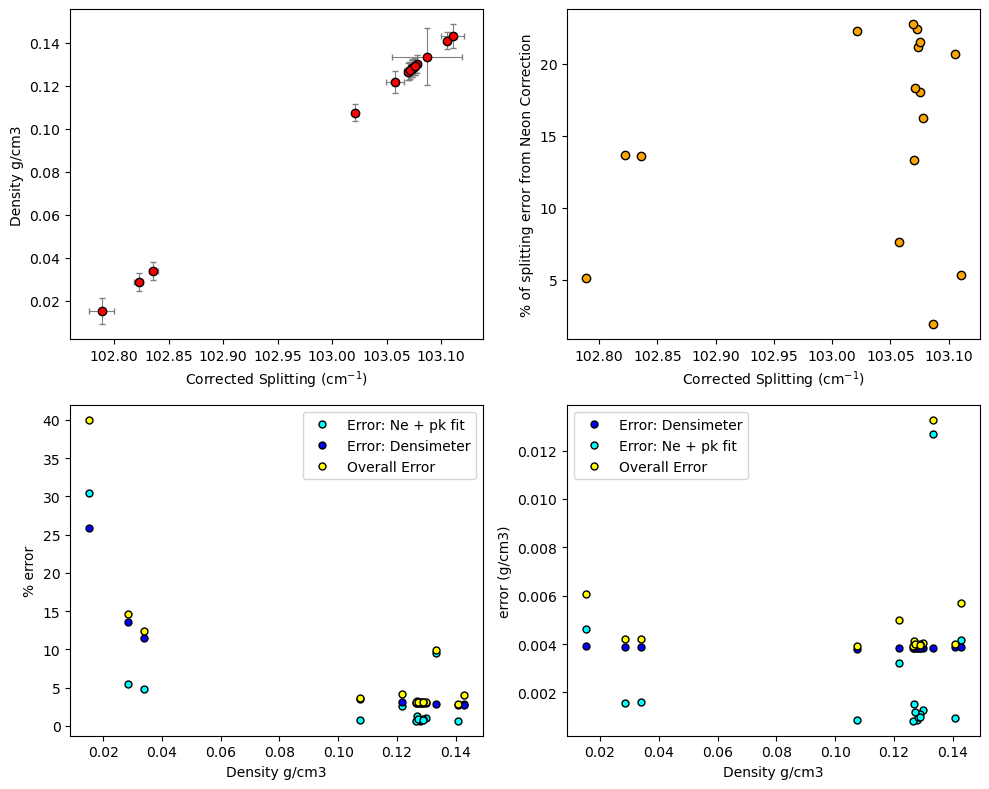

In [17]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## IF FIs
- This calculates an estimated pressure of entrapment based on a temperature you have estimated

Text(0.5, 0, 'Depth (km)')

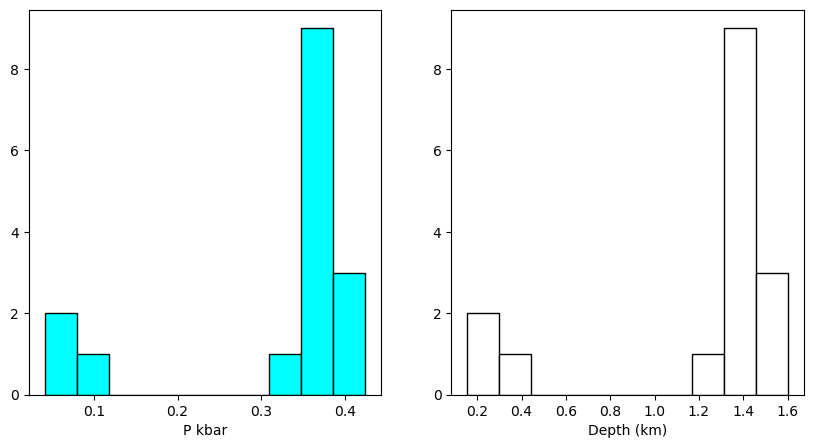

In [20]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2700)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan')
ax2.hist(Depth, ec='k', fc='white')
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')